In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
import numpy as np
import pandas as pd

concreteData = pd.read_csv('/content/drive/MyDrive/DL-Assignments/compresive_strength_concrete.csv')

In [137]:
concreteData.shape

(1030, 9)

In [138]:
concreteData.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [139]:
concreteData.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [140]:
X_train = concreteData.sample(frac=0.7 , random_state=123)
X_test = concreteData.drop(X_train.index)

In [141]:
X_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80
...,...,...,...,...,...,...,...,...,...
931,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56
983,136.4,161.6,125.8,171.6,10.4,922.6,764.4,28,29.07
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54


In [142]:
X_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.81
...,...,...,...,...,...,...,...,...,...
1018,321.4,0.0,127.9,182.5,11.5,870.1,779.7,28,37.27
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.46
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92


In [143]:
X_train = X_train.iloc[: , 0:-1]
Y_train = X_train.iloc[: , -1]
X_test = X_test.iloc[: , 0:-1]
Y_test = X_test.iloc[: , -1]

In [144]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [145]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [146]:
X_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
134,0.805454,1.303810,-0.828060,-0.788615,0.922719,-0.348682,-0.241282,-0.282950
13,-0.859113,1.315264,-0.828060,2.191863,-1.034088,-0.513035,-1.299946,0.700674
996,-1.219802,1.873117,-0.828060,0.869306,0.028661,0.390257,-1.128438,-0.282950
770,0.674295,-0.861162,-0.828060,0.491432,-1.034088,0.975198,0.378124,-0.679572
937,0.330001,-0.861162,0.916440,-0.146229,0.315434,0.391552,-1.069212,-0.282950
...,...,...,...,...,...,...,...,...
931,-1.302741,-0.689339,2.182360,-0.264315,-0.021946,0.638728,-0.818735,-0.282950
466,-0.856220,-0.861162,1.104784,-0.708316,0.635946,1.389314,0.290519,0.859323
983,-1.376036,0.989946,1.114047,-0.472145,0.720291,-0.634682,-0.135168,-0.282950
918,-1.293097,-0.861162,1.935351,0.963774,0.315434,-1.910680,1.155465,-0.282950


In [147]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [148]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


In [149]:
X_train

array([[ 0.80545429,  1.30380957, -0.82805958, ..., -0.34868242,
        -0.24128161, -0.28294978],
       [-0.85911335,  1.31526445, -0.82805958, ..., -0.51303507,
        -1.2999464 ,  0.70067422],
       [-1.21980182,  1.87311692, -0.82805958, ...,  0.39025745,
        -1.12843776, -0.28294978],
       ...,
       [-1.37603586,  0.98994597,  1.11404672, ..., -0.63468191,
        -0.13516836, -0.28294978],
       [-1.2930968 , -0.86116202,  1.93535081, ..., -1.91067965,
         1.15546493, -0.28294978],
       [-1.0288491 , -0.7053757 ,  1.8334597 , ...,  0.44849264,
         0.99999668, -0.50505842]])

In [150]:
X_train.dtype

dtype('float64')

In [151]:
from keras import layers
from keras import models

In [152]:
network = models.Sequential()
network.add(layers.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64,activation="relu"))
network.add(layers.Dense(32,activation="relu"))
network.add(layers.Dense(1))
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [153]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 0.6407 - mae: 0.4897 - val_loss: 0.0245 - val_mae: 0.1173
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0197 - mae: 0.1023 - val_loss: 0.0099 - val_mae: 0.0778
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0126 - mae: 0.0847 - val_loss: 0.0231 - val_mae: 0.1220
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0135 - mae: 0.0857 - val_loss: 0.0048 - val_mae: 0.0520
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0606 - val_loss: 0.0118 - val_mae: 0.0890
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0073 - mae: 0.0642 - val_loss: 0.0102 - val_mae: 0.0793
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0067 - mae: 0.0580 - val_loss: 0.0102 - val_mae: 0.0661
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0064 - m

In [154]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0112 - mae: 0.0558


In [155]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [156]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

In [157]:
len(history.history['val_loss'])

200

In [158]:
len(history.history['loss'])

200

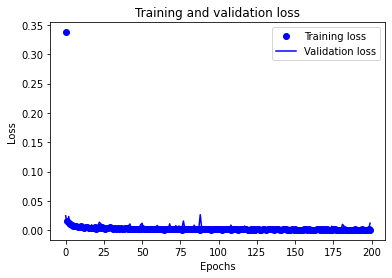

In [159]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

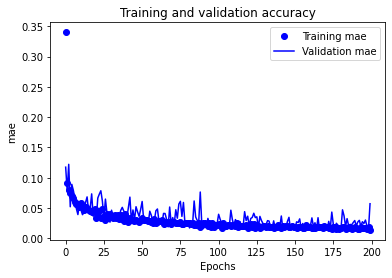

In [160]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [161]:
y_pred = network.predict(X_test)

In [162]:
def denorm(x):
    return (x * Y_std) + Y_mean
    

In [163]:
y_pred = denorm(y_pred)
y_true = denorm(Y_test)
y_pred = y_pred.flatten()

(0.0, 100.0)

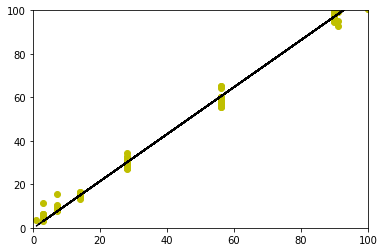

In [164]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)